## Customer Segmentation Project
#### 1. Explore the general distribution of the data to get a sense of Male vs. Female customers, and how their income, age, and spending scores are similar or different.
#### 2. Explore which gender has a higher income.
#### 3. Explore which gender has a higher average spending score.

## Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv(r'C:\Users\DELL\Documents\Exposys Data Labs\Mall_Customers.csv')
X = customers.iloc[:, [3, 4]].values

In [3]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA

In [4]:
# Check to see descriptive statistics
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### From calling describe, we can see that there are no values to clean. Age looks pretty normally distributed, annual income in the thousands doesn't have outliers that are too excessive. Spending score is in fact between 1 and 100. Everything looks good.

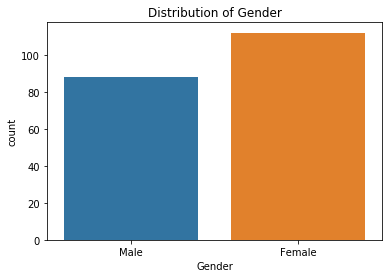

In [5]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='Gender', data=customers);
plt.title('Distribution of Gender');

There are more women than men in this dataset.

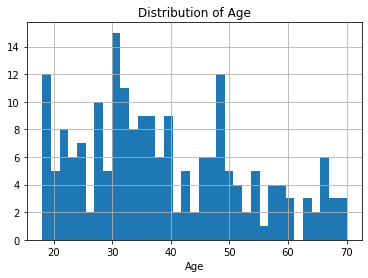

In [6]:
# Histogram of ages
customers.hist('Age', bins=35);#dataset is divided into equal parts known as bins.
plt.title('Distribution of Age');
plt.xlabel('Age');

#### Age histogram is somewhat right-tailed. We saw that the average age was 38 as well, so this is not surprising, with a spike in ages 48-49 and 65 as well.

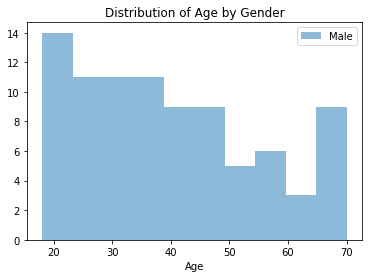

In [7]:
# Histogram of ages by gender
plt.hist('Age', data=customers[customers['Gender'] == 'Male'], alpha=0.5, label='Male');
#plt.hist('Age', data=customers[customers['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

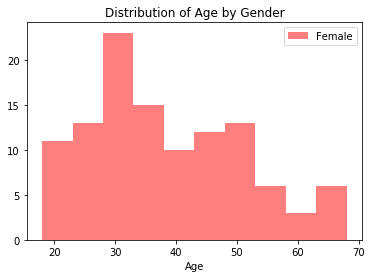

In [8]:
# Histogram of ages by gender
#plt.hist('Age', data=customers[customers['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Age', data=customers[customers['Gender'] == 'Female'], alpha=0.5, label='Female',color='red');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

### We can see two things here, one reflected earlier in the describe call:

#### 1. There are more women than men in this data set.

#### 2. There are a lot of younger women and middle-aged women.

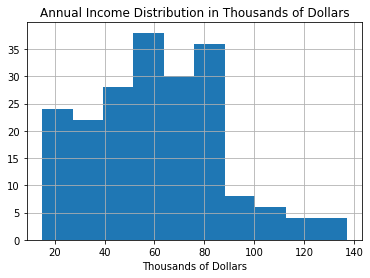

In [9]:
# Histogram of income
customers.hist('Annual Income (k$)');
plt.title('Annual Income Distribution in Thousands of Dollars');
plt.xlabel('Thousands of Dollars');

#### The most frequent annual incomes are between around 50 and 85,000.

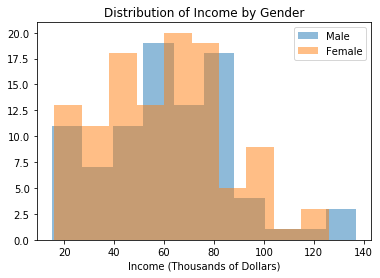

In [10]:
# Histogram of income by gender
plt.hist('Annual Income (k$)', data=customers[customers['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=customers[customers['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();

#### Women generally had lower income than men, the majority falling between 45 and 80,000.

In [11]:
# Create data sets by gender
male_customers = customers[customers['Gender'] == 'Male']
female_customers = customers[customers['Gender'] == 'Female']

In [12]:
# Print the average spending score for men and women
print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


#### Women on average had a higher spending score by about 3 points.

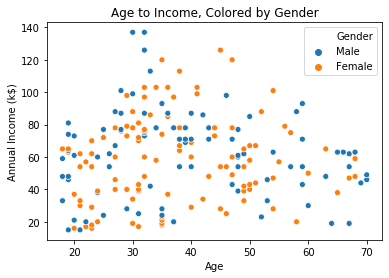

In [13]:
sns.scatterplot('Age', 'Annual Income (k$)',hue='Gender', data=customers);
plt.title('Age to Income, Colored by Gender');

#### There is pretty much no correlation between age and income for either men or women in this data. The correlation matrix below confirms this.

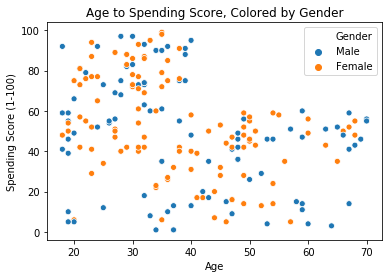

In [14]:
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Gender', data=customers);
plt.title('Age to Spending Score, Colored by Gender');

#### Comparing men to women reveals that there is a slightly higher correlation between age and spending score for women.

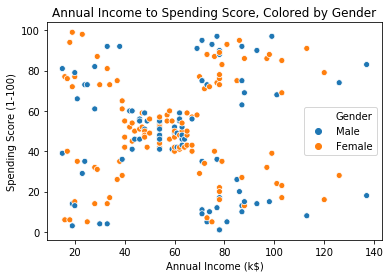

In [15]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Gender', data=customers);
plt.title('Annual Income to Spending Score, Colored by Gender');

### Using the elbow method to find the optimal number of clusters

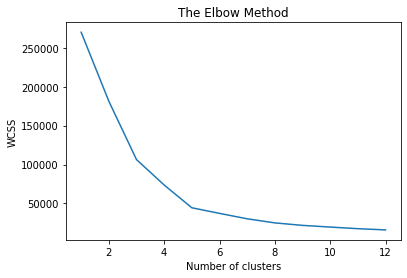

In [16]:
from sklearn.cluster import KMeans
wcss = []#within clusters sum of squares.
for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 13), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [20]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


## Visualising the clusters

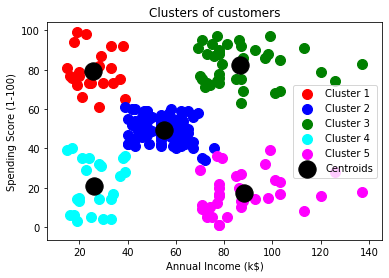

In [21]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')#column 0 for annual score
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')#column 1 for spending score
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


#### Annual Income and Spending Score have somewhat related means and standard deviations, which is why we see this strange shape. But there is very low if no correlation here.
  
#### There are 5 rough clusters here:
1. Low income, low spending score
2. Low income, high spending score
3. Mid income, medium spending score
4. High income, low spending score
5. High income, high spending score

Interestingly, there are no high income, medium spending score points.

## Interpretation and Actions

### Based on these data, the following hypotheses could be tested:

1. Marketing cheaper items to women to see if they purchase more frequently or more volume.

2. Marketing more to younger women because their spending score tends to be higher.

3. Thinking up new ways to target advertising, pricing, branding, etc. to the older women (older than early 40s) who have lower spending scores.

4. Figure out a way to gather more data to build a data set that has more features. The more features, the better understanding of what determines Spending Score. Once Spending Score is better understood, we can understand what factors will lead to increasing Spending Score, thus lead to greater profits.